# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2
33,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235,0
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,2
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465,1
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630,2
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515,2
58,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285,0
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695,2
164,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615,2


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [2]:
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

In [3]:
features=['Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_315_of_diluted_wines', 'Proline']
I, o = data[features].values, data['WineVariety'].values

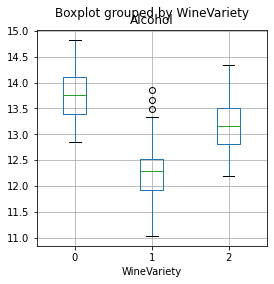

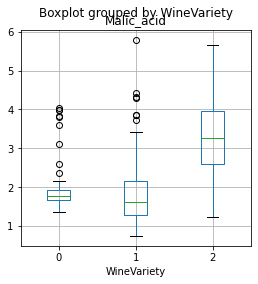

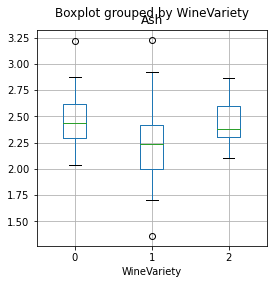

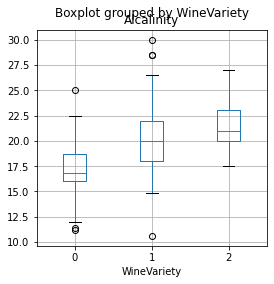

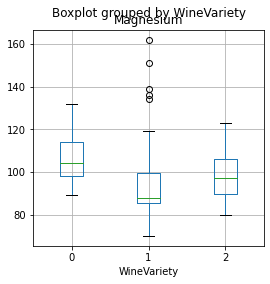

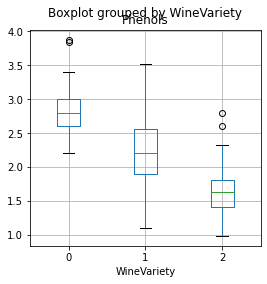

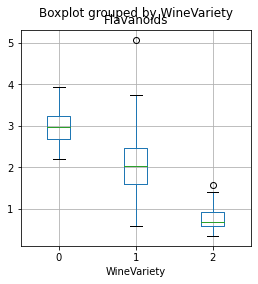

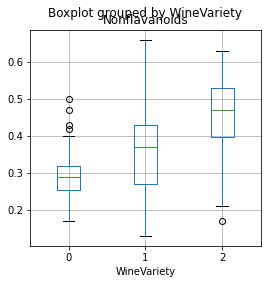

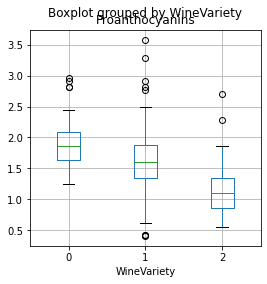

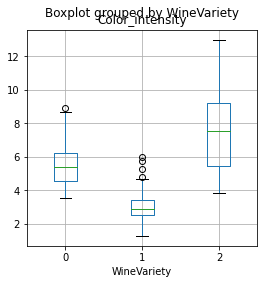

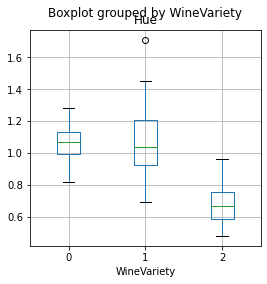

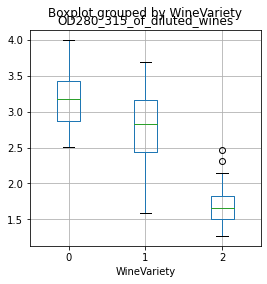

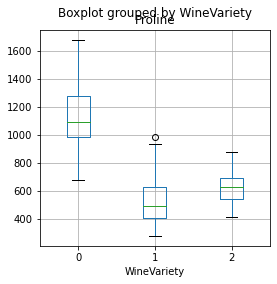

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
for cols in features:
    data.boxplot(column=cols, by='WineVariety', figsize=(4,4))
    plt.title(cols)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

I_train, I_test, o_train, o_test = train_test_split(I, o, test_size=0.3, random_state=0,  stratify=o)

print ('Training Set: %d, Test Set: %d \n' % (I_train.shape[0], I_test.shape[0]))

Training Set: 124, Test Set: 54 



In [6]:
from sklearn.linear_model import LogisticRegression

reg=0.001

model = LogisticRegression(C=1/reg, solver="lbfgs", max_iter=10000).fit(I_train, o_train)
print(model)

LogisticRegression(C=1000.0, max_iter=10000)


In [8]:
wine_classifications= model.predict(I_test)
print(wine_classifications[:15])
print(o_test[:15])

[0 1 0 0 1 2 1 2 0 2 0 1 2 0 2]
[0 1 0 0 1 2 1 2 0 2 0 1 2 0 2]


In [11]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix

mcm= confusion_matrix(o_test, wine_classifications)

print(classification_report(o_test, wine_classifications))
print("Accuracy: ", accuracy_score(o_test, wine_classifications))
print("Precision: ", precision_score(o_test, wine_classifications, average='macro'))
print("Recall: ", recall_score(o_test, wine_classifications, average='macro'))
print("Confusion Matrix: \n", mcm)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.90      0.95        21
           2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Accuracy:  0.9629629629629629
Precision:  0.9616228070175438
Recall:  0.9682539682539683
Confusion Matrix: 
 [[18  0  0]
 [ 1 19  1]
 [ 0  0 15]]


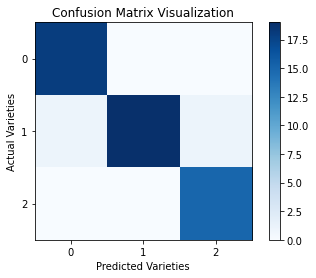

In [22]:
import numpy as np
import matplotlib.pyplot

WineVariety=["0", "1", "2"]

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks=np.arange(len(WineVariety))
plt.xticks(tick_marks, WineVariety)
plt.yticks(tick_marks, WineVariety)
plt.xlabel("Predicted Varieties")
plt.ylabel("Actual Varieties")
plt.title("Confusion Matrix Visualization")
plt.show()

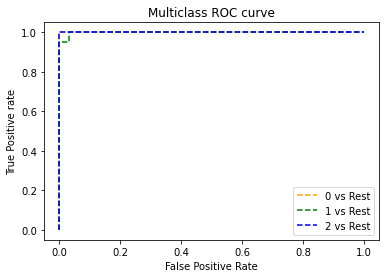

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

winec_prob = model.predict_proba(I_test)

fpr={}
tpr={}
thresh={}

for i in range(len(WineVariety)):
    fpr[i], tpr[i], thresh[i] = roc_curve(o_test, winec_prob[:, i], pos_label=i)

# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=WineVariety[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=WineVariety[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=WineVariety[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


In [34]:
auc = roc_auc_score(o_test, winec_prob, multi_class='ovr')
print(auc)

0.9995189995189996


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#('logregressor', RandomForestClassifier(n_estimators=1000)

feature_columns=[0,1,2,3,4,5,6,7,8,9,10,11,12]
feaure_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

preprocessor=ColumnTransformer(
    transformers=[('preprocess', feaure_transformer, feature_columns)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=1000))])

model = pipeline.fit(I_train, o_train)
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])])),
                ('logregressor', RandomForestClassifier(n_estimators=1000))])


In [60]:
wine_classifications = model.predict(I_test)
winec_prob = model.predict_proba(I_test)

In [58]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix

mcm= confusion_matrix(o_test, wine_classifications)

print(classification_report(o_test, wine_classifications))
print("Accuracy: ", accuracy_score(o_test, wine_classifications))
print("Precision: ", precision_score(o_test, wine_classifications, average='macro'))
print("Recall: ", recall_score(o_test, wine_classifications, average='macro'))
print('Average AUC:', roc_auc_score(o_test, winec_prob, multi_class='ovr'))
print("Confusion Matrix: \n", mcm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Average AUC: 1.0
Confusion Matrix: 
 [[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]


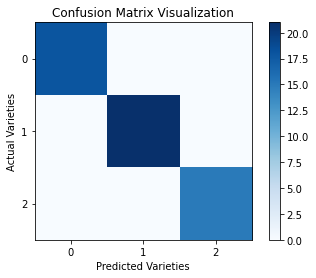

In [61]:
import numpy as np
import matplotlib.pyplot

WineVariety=["0", "1", "2"]

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks=np.arange(len(WineVariety))
plt.xticks(tick_marks, WineVariety)
plt.yticks(tick_marks, WineVariety)
plt.xlabel("Predicted Varieties")
plt.ylabel("Actual Varieties")
plt.title("Confusion Matrix Visualization")
plt.show()

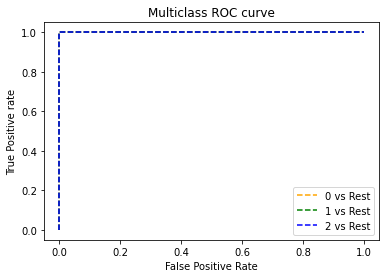

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

winec_prob = model.predict_proba(I_test)

fpr={}
tpr={}
thresh={}

for i in range(len(WineVariety)):
    fpr[i], tpr[i], thresh[i] = roc_curve(o_test, winec_prob[:, i], pos_label=i)

# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=WineVariety[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=WineVariety[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=WineVariety[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


In [64]:
#import model
import joblib
filename='./models/winec.pkl'
joblib.dump(model, filename)

['./models/winec.pkl']

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [70]:
# Your code to predict classes for the two new samples
wineclassifier= joblib.load(filename)
x_new = np.array([[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520],
                 [13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285]])
wine_pred=wineclassifier.predict(x_new)


In [77]:
for p in wine_pred:
    print(p, ': ' + str(WineVariety[p]) )

1 : 1
0 : 0


1